<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Decision Tree Regressionn</h1>
</div>

### Decision Tree Regressor

**Regression Tree** :Mean of response variable became a prediction for that class.
For continuous quantitative target variables. 
Eg. Predicting rainfall, predicting revenue, predicting marks etc. 

**Splitting the nodes in Regression Tree**: We are going to know more about the Decision Tree, how it arranges the data and predicts the output in the Regression Tree.

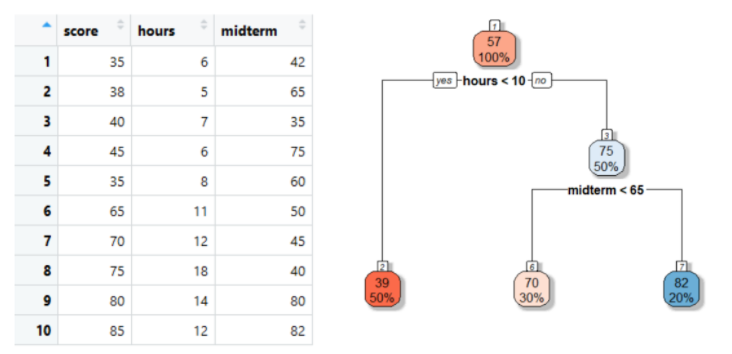

Now, we have taken another example to create a decision tree where we took a dataset for predicting the score using Midterm marks also based on the hours they studied in Midterm exam using these two columns we will predict the final score of a student We have divided the data using the mean value of the Midterm column. In the above figure we can see that it constructed a Decision tree. This type of split is done in the Regression Tree.


**TERMINOLOGIES:**
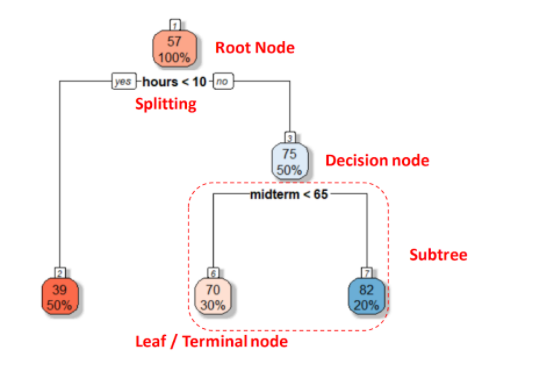

1. **Root Node:** The Root node represents the entire data we are using, and it further divides into two or more heterogeneous datasets.


2. **Splitting:** The process of dividing the node into two or more sub-nodes based on the condition we applied.


3. **Decision Node:** Based on the condition the Decision node further divides into two or more sub-nodes


4. **Subtree:** A subsection of the entire tree is called the subtree.


5. **Leaf/Terminal Node:** The node which cannot further divide into sub-node is called leaf/terminal node.

 
The Decision Tree in the above picture is divided using the Mean value of the Midterm column. We have splitted the data using some conditions as you can see students who studied hours<10 are placed on the left and students who studied more than 10 hrs are moved to the right subtree.


**How a Decision Tree works?**

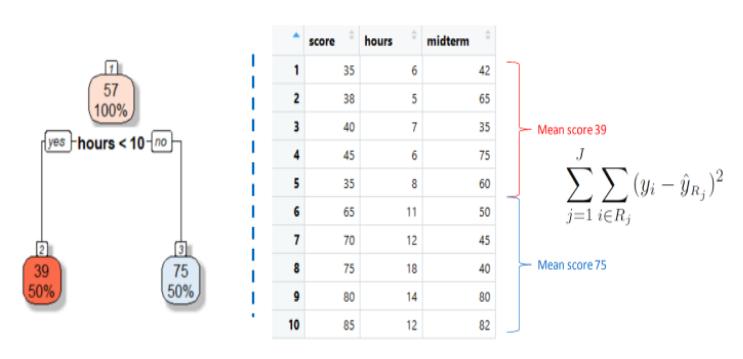


Root Node: The Root node represents the entire data we are using, and it further divides into two or more heterogeneous datasets.
Splitting: The process of dividing the node into two or more sub-nodes based on the condition we applied.
Decision Node: Based on the condition the Decision node further divides into two or more sub-nodes
Subtree: A subsection of the entire tree is called the subtree.
Leaf/Terminal Node: The node which cannot further divide into sub-node is called leaf/terminal node.
 
The Decision Tree in the above picture is divided using the Mean value of the Midterm column. We have splitted the data using some conditions as you can see students who studied hours<10 are placed on the left and students who studied more than 10 hrs are moved to the right subtree.


### Content : 
1. Convert Business Problem to Data Science Problem
2. Load Data
3. Data Overview
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Building

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

In this section you will:

- Import the libraries
- Set the options for better visulization

In [14]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import random

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In this section you will:

- Load the data

Read the data using pd.read_csv() function

In [15]:
# Load the csv file
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data Overview</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

In [16]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [17]:
# Summary statistic of the data
df.describe()  

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
# Get count of missing values in every column
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The data contains few categorical columns, these columns needs to be encoded before building the model
- Most of the columns have missing values, these needs to be handled before building the model
- The y variable contains missing values, it's better to drop these values

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Exploratory Data Analysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Remove extra spaces in column names (if applicable)
- Check the distribution of target class
- Check the correlation between different features
- Check the realation between different features

###

In [19]:
# Create list of numeric and categorical columns and check if they have extra spaces in the column names
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


Few columns like Life expectancy, Measles etc. are having extra spaces in their column names. These needs to be removed

In [20]:
# Remove the extra space from column names
df = df.rename(columns=lambda x: x.strip())

Get list of new column names for further operations

In [21]:
# Create list of numeric and categorical columns
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


In [22]:
df.dropna(subset=['Life expectancy'], inplace = True)

/Users/ajaykumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


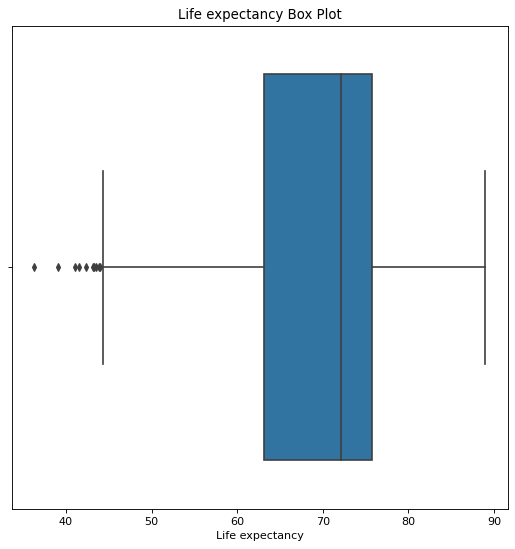

In [23]:
# Check the distribution of y variable (Life Expectancy) using box plot
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

/Users/ajaykumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Life expectancy Distribution Plot'}, xlabel='Life expectancy', ylabel='Density'>

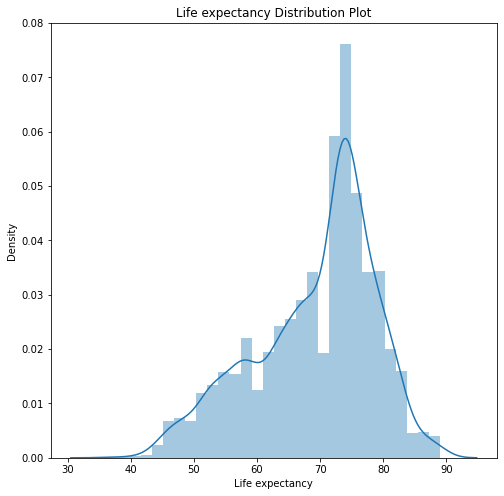

In [24]:
# Check the distribution of y variable (Life Expectancy) using dist plot
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df['Life expectancy'])

#### Summary : 

The y variable is having very few outliers and is almost linearly distributed. So the assumption for linear regression holds true

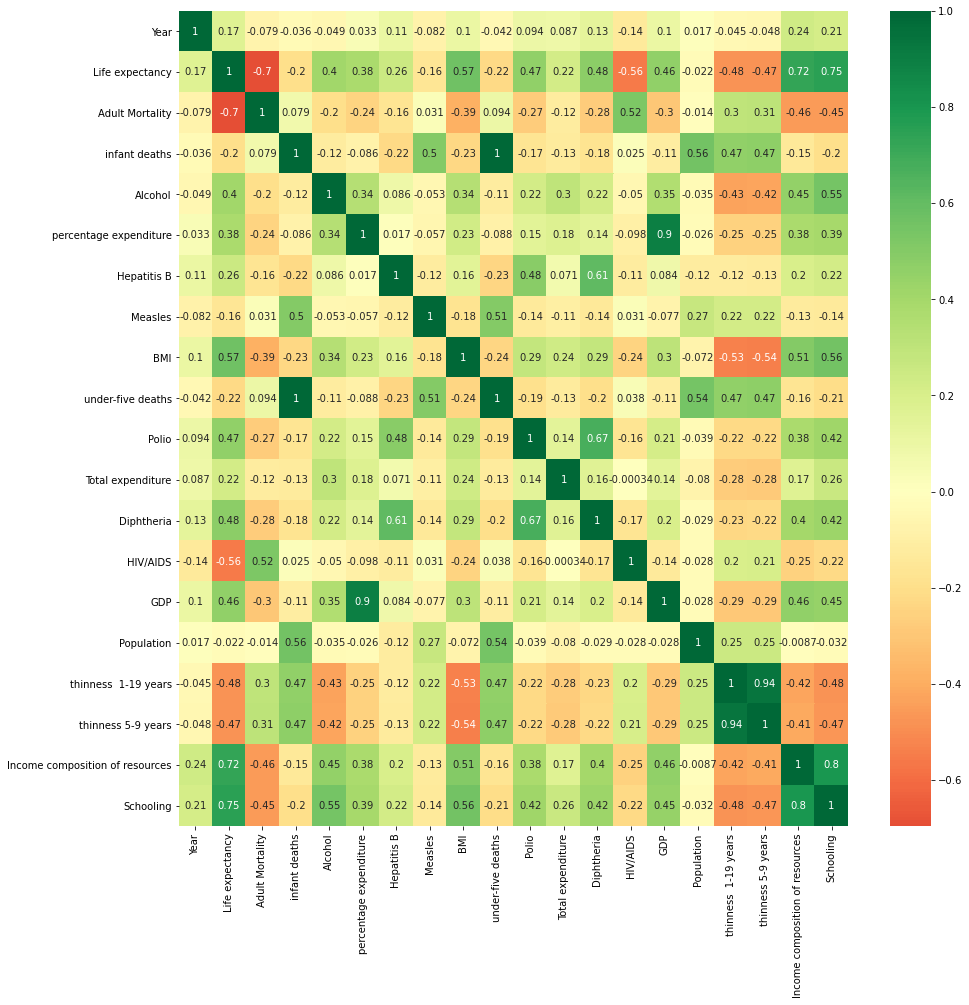

In [25]:
# Check the multicollinearity of features using the correlation matric
plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data by imputing missing values
- Encode the categorical features
- Split the dataset in X and y dataset
- Split the data in train and test set

In [26]:
# Replace na values by mean of the values in column
for i in df.columns.drop(['Country','Status']):             
    df[i].fillna(df[i].mean(), inplace = True)

In [27]:
# Create label encoder object 
label_encoder = LabelEncoder() 
  
# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])
  
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [28]:
df.to_csv('life_expectancy_data_cleaned.csv', index = False)

In [29]:
# Split the dataset in X and y
X = df.drop(columns=['Life expectancy','Country'])
y = df[['Life expectancy']]

In [30]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X_train.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1640,2009,0,63.0,0,7.380000,335.518057,86.0,1,67.1,0,73.0,8.330000,73.0,0.1,2675.582590,412477.0,0.8,0.7,0.815,14.4
266,2005,1,191.0,0,6.250000,365.799896,96.0,0,43.8,0,96.0,4.450000,96.0,0.8,3933.332215,283277.0,3.6,3.5,0.695,12.8
1458,2015,1,98.0,1,4.614856,0.000000,81.0,39,66.1,1,75.0,5.930163,81.0,0.1,846.632851,5851479.0,4.9,4.9,0.763,13.3
677,2011,0,57.0,0,10.690000,2443.325028,96.0,0,58.3,0,99.0,7.540000,99.0,0.1,32233.839420,1124835.0,0.9,1.0,0.847,13.8
1267,2014,1,6.0,1,2.620000,4348.335310,97.0,6,64.6,1,95.0,7.810000,95.0,0.1,37582.846240,82157.0,1.2,1.1,0.895,16.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Model Building </h2>
</div>

**Parameters**

1. **criterion** : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”


The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.


2. **splitter**:{“best”, “random”}, default=”best”


The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

3. **max_depth** :int default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


4. **min_samples_split** :int or float, default=2
The minimum number of samples required to split an internal node

### 6.1 Training Regression Tree Model 1

In [31]:
# Importing the library
from sklearn.tree import DecisionTreeRegressor

In [32]:
#storing the Decision tree regression into regtree
regtree = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,min_samples_split=2)

In [33]:
#Fitting the model into clftree variable
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
#predicting values
y_pred = regtree.predict(X_test)
y_pred

array([74.01487252, 55.53875969, 55.53875969, 74.01487252, 55.53875969,
       80.61834862, 63.34834437, 80.61834862, 74.01487252, 74.01487252,
       80.61834862, 74.01487252, 63.34834437, 74.01487252, 55.53875969,
       70.04633431, 74.01487252, 74.01487252, 70.04633431, 80.61834862,
       70.04633431, 70.04633431, 53.89411765, 80.61834862, 63.12076503,
       74.01487252, 63.34834437, 74.01487252, 70.04633431, 80.61834862,
       80.61834862, 74.01487252, 70.04633431, 53.89411765, 63.12076503,
       74.01487252, 63.34834437, 74.01487252, 80.61834862, 80.61834862,
       80.61834862, 70.04633431, 80.61834862, 74.01487252, 80.61834862,
       63.34834437, 63.12076503, 74.01487252, 80.61834862, 63.34834437,
       55.53875969, 74.01487252, 74.01487252, 74.01487252, 74.01487252,
       70.04633431, 53.89411765, 70.04633431, 74.01487252, 74.01487252,
       74.01487252, 53.89411765, 74.01487252, 80.61834862, 80.61834862,
       53.89411765, 53.89411765, 70.04633431, 63.12076503, 74.01

### Evaluation Metrics

In [40]:
# MSE - Mean Squared Error
model_mse = mean_squared_error(y_test, y_pred)
print(model_mse)

15.392988105696272


In [41]:
# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

15.68389661266107

###  Training Regression Tree Model 2

In [42]:
regtree2 = DecisionTreeRegressor(criterion='mae',splitter='random',max_depth=4,min_samples_split=3)

In [43]:
regtree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_split=3,
                      splitter='random')

In [44]:
#predicting values
y_pred = regtree2.predict(X_test)
y_pred

array([73.25, 54.1 , 53.4 , 72.1 , 65.5 , 79.8 , 63.2 , 79.8 , 74.6 ,
       74.6 , 81.5 , 72.1 , 65.5 , 65.5 , 58.  , 72.1 , 75.3 , 73.25,
       73.25, 75.3 , 72.1 , 74.6 , 65.5 , 79.8 , 63.2 , 63.2 , 63.2 ,
       73.25, 73.25, 79.8 , 75.3 , 65.5 , 65.5 , 54.1 , 65.5 , 72.1 ,
       65.5 , 72.1 , 75.3 , 79.8 , 74.6 , 72.1 , 79.8 , 72.1 , 75.3 ,
       65.5 , 58.  , 63.2 , 79.8 , 65.5 , 58.  , 58.  , 75.3 , 79.8 ,
       65.5 , 73.25, 58.  , 65.5 , 79.8 , 72.1 , 65.5 , 65.5 , 72.1 ,
       79.8 , 79.8 , 53.4 , 54.1 , 65.5 , 72.1 , 73.25, 73.25, 54.1 ,
       73.25, 79.8 , 75.3 , 81.5 , 58.  , 65.5 , 75.3 , 75.3 , 75.3 ,
       73.25, 65.5 , 79.8 , 72.1 , 79.8 , 73.25, 58.  , 58.  , 63.2 ,
       75.3 , 72.1 , 75.3 , 73.25, 58.  , 73.25, 72.1 , 72.1 , 58.  ,
       72.1 , 81.5 , 72.1 , 51.9 , 79.8 , 63.2 , 73.25, 58.  , 75.3 ,
       65.5 , 72.1 , 54.1 , 58.  , 72.1 , 73.25, 74.6 , 79.8 , 54.1 ,
       65.5 , 72.1 , 75.3 , 54.1 , 72.1 , 65.5 , 65.5 , 73.25, 75.3 ,
       72.1 , 79.8 ,

In [45]:
# MSE - Mean Squared Error
model_mse = mean_squared_error(y_test, y_pred)
print(model_mse)

22.709419795221844


In [46]:
# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

15.058889028622088

###  Training Regression Tree Model 3

In [47]:
regtree3 = DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_depth=5,min_samples_split=4)

In [48]:
regtree3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=4)

In [49]:
#predicting values
y_pred = regtree3.predict(X_test)
y_pred

array([74.2258427 , 58.86666667, 49.58125   , 74.2258427 , 58.86666667,
       80.85365854, 64.38545455, 82.47278912, 74.2258427 , 74.2258427 ,
       80.17352941, 74.2258427 , 62.71794872, 74.2258427 , 54.92758621,
       69.01976744, 74.2258427 , 74.2258427 , 72.50514706, 77.06901408,
       72.50514706, 72.50514706, 51.56491228, 82.47278912, 62.48059701,
       66.56666667, 59.74      , 77.70224719, 72.50514706, 82.47278912,
       80.85365854, 74.2258427 , 72.50514706, 56.81967213, 62.48059701,
       66.56666667, 64.38545455, 74.2258427 , 82.47278912, 80.17352941,
       77.06901408, 69.01976744, 82.47278912, 74.2258427 , 80.85365854,
       62.71794872, 62.48059701, 66.56666667, 80.17352941, 59.74      ,
       58.86666667, 72.109375  , 74.2258427 , 77.70224719, 74.2258427 ,
       72.50514706, 51.56491228, 66.97070707, 74.2258427 , 66.56666667,
       74.2258427 , 51.56491228, 74.2258427 , 80.85365854, 80.17352941,
       51.56491228, 56.81967213, 69.01976744, 69.53773585, 74.22

In [52]:
# MSE - Mean Squared Error
model_mse = mean_squared_error(y_test, y_pred)
print(model_mse)

9.563146779565235


In [53]:
# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

15.97300500379892

<a class="anchor" id="8"></a>
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7.Hyperparameter Tuning Using GridSearchCV</h2>
</div>

**Parameters**

1. **criterion** : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”


The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.


2. **splitter**:{“best”, “random”}, default=”best”


The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

3. **max_depth** :int default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


4. **min_samples_split** :int or float, default=2
The minimum number of samples required to split an internal node

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. This method tries every possible combination of each set of hyper-parameters. Using this method, we can find the best set of values in the parameter search space. This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [54]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
# Assigning all the parameters of Decision tree regressor for  parameters variable
parameters ={
    'max_depth': [3,4,5,6,7,8,9,11,13],
    'criterion':['mae','mse','friedman_mse'],
    'splitter':['random','best'],
    'min_samples_split':[2,4,6,7,8,9],
    }

In [56]:
# Assigning parameters for GridSearchCV
grid_search = GridSearchCV(regtree,parameters, refit=True, verbose=2, cv=3,)

In [57]:
# Fitting the model into gridsearchCV

result = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=mae, max_depth=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=mae, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_split=4, splitter=best; total time=   0.1s
[CV] 

**best_index_:** (int) The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.


In [58]:
print('Best index: ', result.best_index_)

Best index:  299


**best_params (dict)**: Parameter setting that gave the best results on the hold out data.

In [59]:
print('Best Params: ', result.best_params_)

Best Params:  {'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_split': 9, 'splitter': 'best'}


**best_score (float) :
Mean cross-validated score of the best_estimator**

For multi-metric evaluation, this is present only if refit is specified.

This attribute is not available if refit is a function.

In [60]:
print('Best Score: ', result.best_score_)

Best Score:  0.9131691610552339


**cv_results :dict of numpy (masked) ndarrays
A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.**

In [61]:
print('CV results: ', result.cv_results_)

CV results:  {'mean_fit_time': array([0.05412022, 0.11839199, 0.04707964, 0.1166691 , 0.04884013,
       0.12016439, 0.0467786 , 0.11709801, 0.04718335, 0.11671329,
       0.04782534, 0.12139916, 0.05603711, 0.13242571, 0.06036274,
       0.13259339, 0.05193106, 0.14369392, 0.05886801, 0.15269359,
       0.05819225, 0.15068603, 0.05632997, 0.14043037, 0.06152956,
       0.16817896, 0.06627059, 0.16035835, 0.06222415, 0.14783168,
       0.05757689, 0.14909903, 0.05716602, 0.14486949, 0.05913337,
       0.15302785, 0.0685842 , 0.15992896, 0.07042456, 0.16956909,
       0.07296737, 0.17471425, 0.0722038 , 0.18663534, 0.08865197,
       0.20978212, 0.06939658, 0.17280229, 0.07072719, 0.17395099,
       0.07438962, 0.17755556, 0.07798473, 0.19057329, 0.08199914,
       0.17507529, 0.07226308, 0.17413799, 0.07913041, 0.18127338,
       0.0741357 , 0.19067367, 0.07608755, 0.18113144, 0.08065041,
       0.1779983 , 0.07400505, 0.1725537 , 0.07380954, 0.17525832,
       0.07175175, 0.17242734, 

In [62]:
#predicting values
y_pred = result.predict(X_test)
y_pred

array([74.73169399, 58.70344828, 55.3       , 73.00243902, 63.52      ,
       88.        , 63.82580645, 82.67      , 74.73169399, 74.73169399,
       79.2       , 73.00243902, 62.075     , 73.00243902, 63.        ,
       69.22      , 74.73169399, 75.01428571, 71.9147541 , 76.36470588,
       73.36842105, 73.36842105, 52.20588235, 85.64285714, 62.60769231,
       73.8125    , 58.7125    , 72.11666667, 72.49      , 82.345     ,
       81.31428571, 73.00243902, 71.9147541 , 54.36      , 60.74      ,
       73.8125    , 63.82580645, 72.90967742, 83.        , 78.82222222,
       76.36470588, 68.93333333, 80.67777778, 74.73169399, 81.31428571,
       64.35      , 60.05454545, 65.4       , 84.2       , 59.38571429,
       56.18095238, 74.8       , 74.73169399, 77.80333333, 73.00243902,
       71.9147541 , 48.72666667, 61.83333333, 76.17083333, 65.8       ,
       73.00243902, 51.36666667, 73.00243902, 79.85      , 79.2       ,
       54.34      , 53.06      , 66.90769231, 72.94      , 74.05

In [63]:
# MSE - Mean Squared Error
model_mse = mean_squared_error(y_test, y_pred)
print(model_mse)

7.3958322934082705


In [64]:
# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

16.25857719510786